In [3]:
import numpy as np

def load_glove(file_path):
    """
    Load GloVe embeddings from a file.

    Args:
        file_path (str): path to GloVe .txt file
    
    Returns:
        dict: word -> embedding vector (numpy array)
    """
    embeddings = {}  # dictionary to store word -> vector

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            # Split the line: first element is the word, rest are numbers
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')  # convert strings to float32
            embeddings[word] = vector

    print(f"Loaded {len(embeddings)} words from GloVe.")
    return embeddings

# Example usage
glove_embeddings = load_glove("D:\DATA\glove.6B.50d.txt")  # adjust path to your file


Loaded 400000 words from GloVe.


In [4]:
print("Vector for 'king':", glove_embeddings['king'][:10])  # first 10 dimensions
print("Vector shape:", glove_embeddings['king'].shape)


Vector for 'king': [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]
Vector shape: (50,)


In [13]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2)

# Example
similarity = cosine_similarity(glove_embeddings['king'], glove_embeddings['queen'])
print("Similarity between 'king' and 'queen':", similarity)


Similarity between 'king' and 'queen': 21.877506


In [20]:
def analogy(word_a, word_b, word_c, embeddings, top_n=1):
    if all(w in embeddings for w in [word_a, word_b, word_c]):
        vec = embeddings[word_a] - embeddings[word_b] + embeddings[word_c]
        sims = {w: cosine_similarity(vec, embeddings[w]) for w in embeddings 
                if w not in [word_a, word_b, word_c]}
        return sorted(sims.items(), key=lambda x: x[1], reverse=True)[:top_n]
    else:
        return []

print(analogy('king', 'man', 'woman', glove_embeddings))


[('emperor', np.float32(25.090244))]


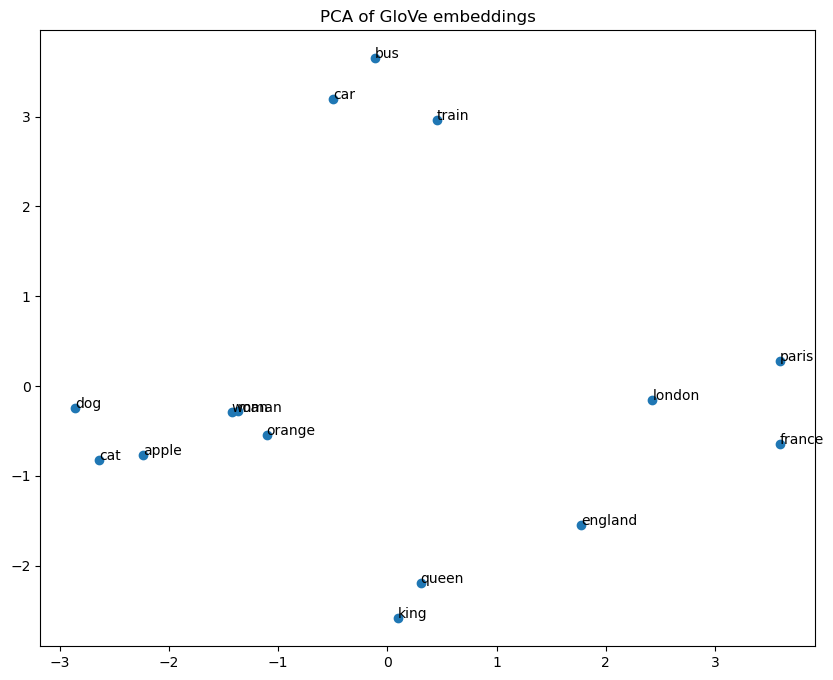

In [22]:
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'dog', 'cat', 
         'paris', 'france', 'london', 'england', 'car', 'bus', 'train']

vectors = np.array([glove_embeddings[word] for word in words])
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i,0], vectors_2d[i,1]))

plt.title("PCA of GloVe embeddings")
plt.show()


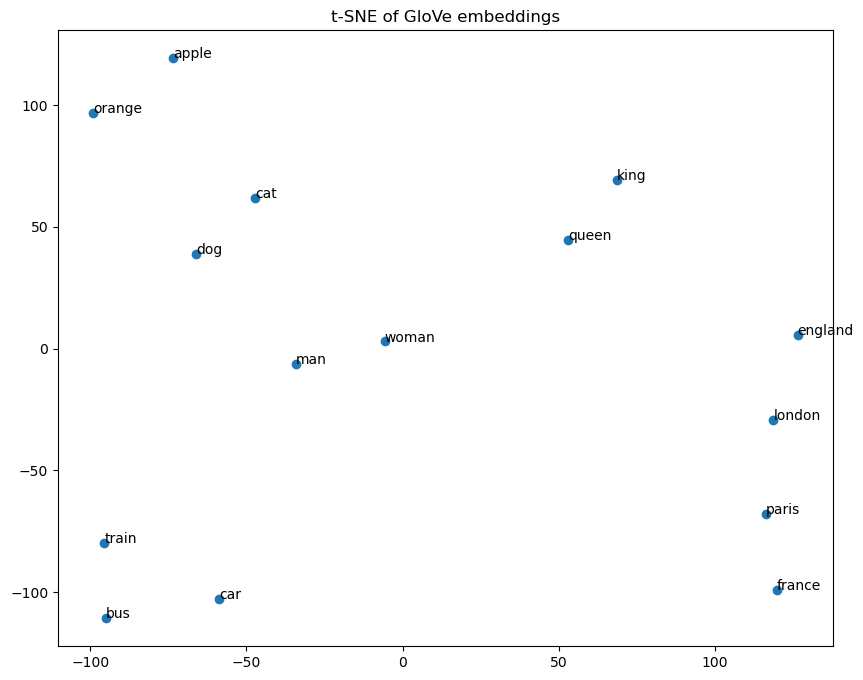

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
vectors_2d_tsne = tsne.fit_transform(vectors)

plt.figure(figsize=(10,8))
plt.scatter(vectors_2d_tsne[:,0], vectors_2d_tsne[:,1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d_tsne[i,0], vectors_2d_tsne[i,1]))

plt.title("t-SNE of GloVe embeddings")
plt.show()


In [30]:
!pip install gensim

  Using cached gensim-4.4.0-cp313-cp313-win_amd64.whl.metadata (8.6 kB)
Using cached gensim-4.4.0-cp313-cp313-win_amd64.whl (24.4 MB)


In [31]:
import gensim.downloader as api
import numpy as np

# Load pretrained models
w2v_model = api.load('word2vec-google-news-300')  # Word2Vec
ft_model = api.load('fasttext-wiki-news-subwords-300')  # FastText
glove_model = api.load('glove-wiki-gigaword-300')  # GloVe

word = 'king'

# Get top 5 most similar words
print("Word2Vec:", w2v_model.most_similar(word, topn=5))
print("FastText:", ft_model.most_similar(word, topn=5))
print("GloVe:", glove_model.most_similar(word, topn=5))


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded
[==================================================] 100.0% 376.1/376.1MB downloaded
Word2Vec: [('kings', 0.7138045430183411), ('queen', 0.6510956287384033), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204219460487366), ('prince', 0.6159993410110474)]
FastText: [('king-', 0.78380286693573), ('boy-king', 0.7704818844795227), ('queen', 0.7704246640205383), ('prince', 0.7700966596603394), ('kings', 0.7668929696083069)]
GloVe: [('queen', 0.6336468458175659), ('prince', 0.6196622848510742), ('monarch', 0.5899620652198792), ('kingdom', 0.5791266560554504), ('throne', 0.5606487393379211)]
